In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical
from keras.datasets import mnist
from keras import utils

In [2]:
(x_train, y_train),(x_test, y_test)=mnist.load_data()

In [13]:
x_train.shape

(60000, 28, 28)

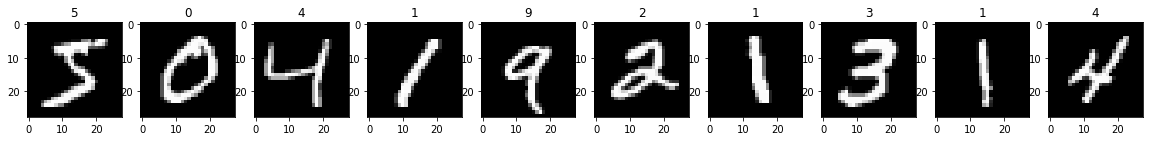

In [9]:
fig, axes=plt.subplots(ncols=10,figsize=(20,4))
for i in range(10):
    axes[i].set_title(y_train[i])
    axes[i].imshow(x_train[i],cmap='gray')

In [14]:
y_train= to_categorical(y_train)
y_test= to_categorical(y_test)

In [16]:
y_test.shape

(10000, 10)

In [20]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(10,activation='relu'))
model.add(Dense(5,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [21]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dense_2 (Dense)             (None, 10)                60        
                                                                 
Total params: 7,965
Trainable params: 7,965
Non-trainable params: 0
_________________________________________________________________


In [23]:
!pip install pydot

In [25]:
!pip install graphviz 

In [32]:
utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [43]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [36]:
model.fit(x_train,y_train, epochs=50, validation_data=(x_test,y_test))

Epoch 1/50
1875/1875 [==============================] - 9s 3ms/step - loss: 2.1354 - accuracy: 0.2430 - val_loss: 1.8073 - val_accuracy: 0.3098
Epoch 2/50
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6374 - accuracy: 0.3571 - val_loss: 1.4959 - val_accuracy: 0.3926
Epoch 3/50
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2856 - accuracy: 0.5107 - val_loss: 1.0696 - val_accuracy: 0.6101
Epoch 4/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.9587 - accuracy: 0.6846 - val_loss: 0.8197 - val_accuracy: 0.7502
Epoch 5/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6783 - accuracy: 0.8094 - val_loss: 0.5926 - val_accuracy: 0.8471
Epoch 6/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5582 - accuracy: 0.8388 - val_loss: 0.5277 - val_accuracy: 0.8479
Epoch 7/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5106 - accuracy: 0.8533 - val_loss: 0.5628 - val_accuracy:

In [39]:
model.save('mnist_model.h5')

In [38]:
y_pred=model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [49]:
model= keras.models.load_model('mnist_model.h5')

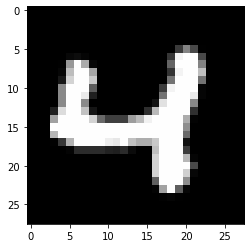

In [60]:
plt.imshow(x_test[556],cmap='gray')

In [61]:
x= np.reshape(x_test[556],(1,28,28,1))
np.argmax(model.predict(x))

1/1 [==============================] - 0s 30ms/step


4